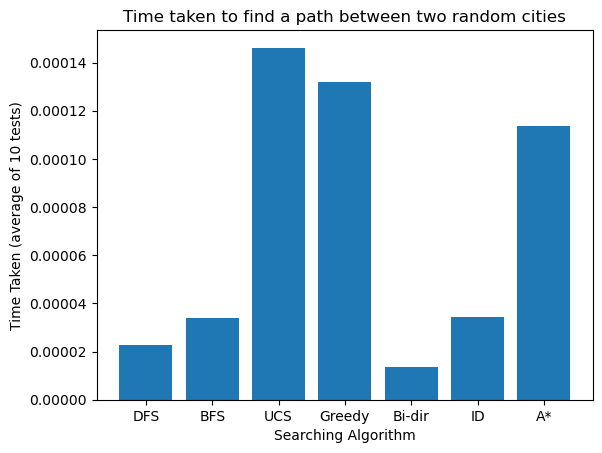

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from experiment_1_cities_benchmark import dfs_times
from experiment_1_cities_benchmark import bfs_times
from experiment_1_cities_benchmark import ucs_times
from experiment_1_cities_benchmark import greedy_times
from experiment_1_cities_benchmark import bidir_times
from experiment_1_cities_benchmark import iterdep_times
from experiment_1_cities_benchmark import aStar_times

result = [
    sum(dfs_times) / 10,
    sum(bfs_times) / 10,
    sum(ucs_times) / 10,
    sum(greedy_times) / 10,
    sum(bidir_times) / 10,
    sum(iterdep_times) / 10,
    sum(aStar_times) / 10
]

titles = ["DFS", "BFS", "UCS", "Greedy", "Bi-dir", "ID", "A*"]
plt.title('Time taken to find a path between two random cities')
plt.xlabel('Searching Algorithm')
plt.ylabel('Time Taken (average of 10 tests)')
plt.bar(titles, result)
plt.show()

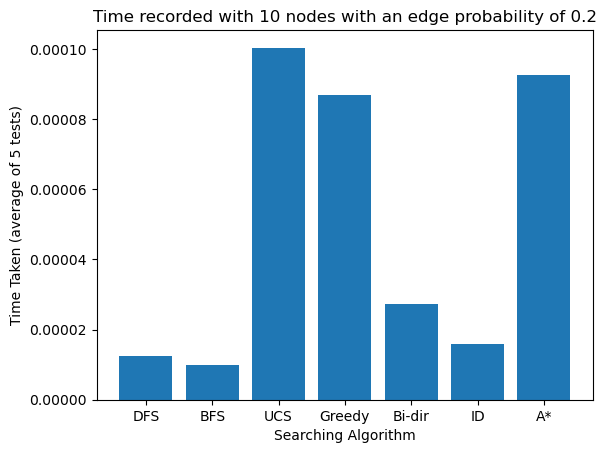

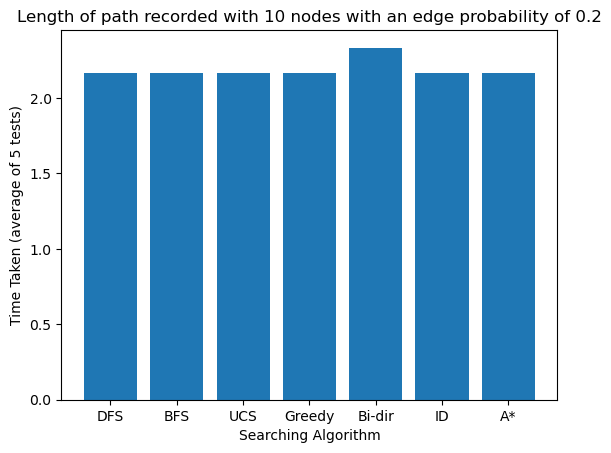

[2.1666666666666665, 2.1666666666666665, 2.1666666666666665, 2.1666666666666665, 2.3333333333333335, 2.1666666666666665, 2.1666666666666665]


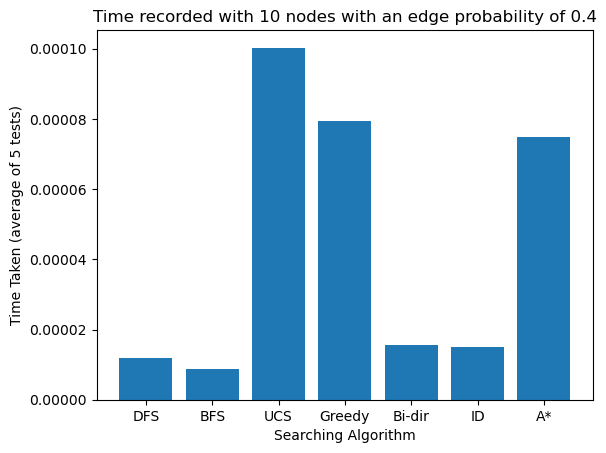

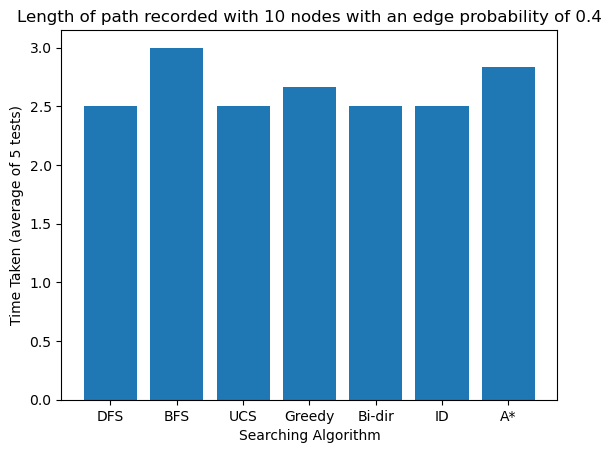

[2.5, 3.0, 2.5, 2.6666666666666665, 2.5, 2.5, 2.8333333333333335]


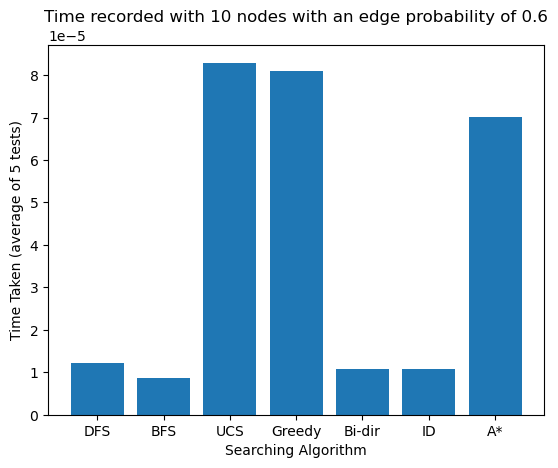

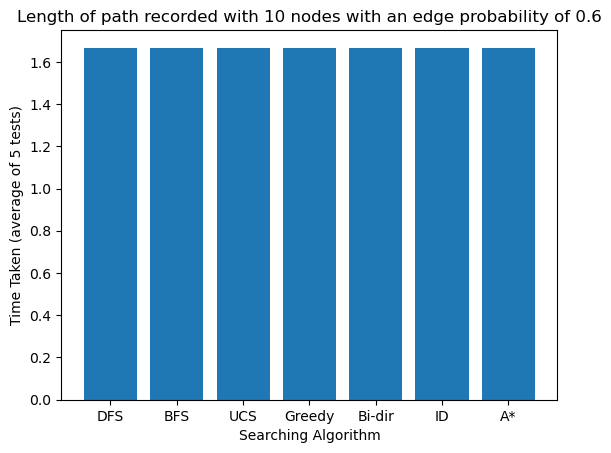

[1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667]


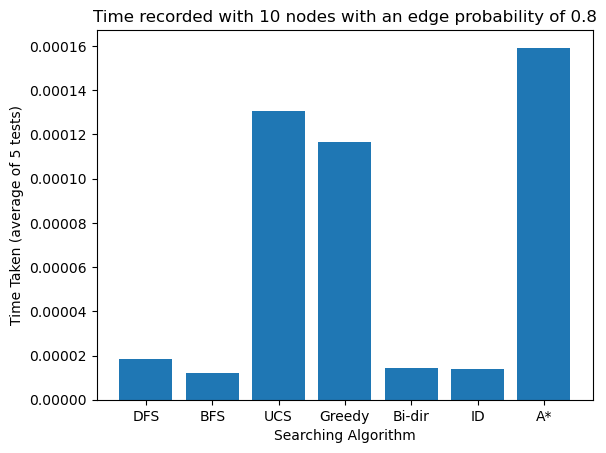

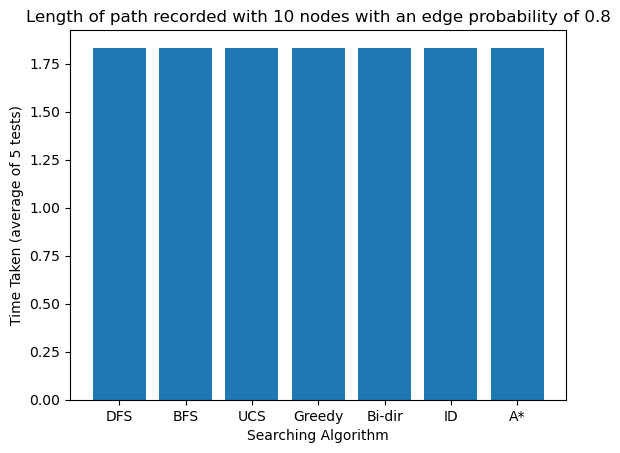

[1.8333333333333333, 1.8333333333333333, 1.8333333333333333, 1.8333333333333333, 1.8333333333333333, 1.8333333333333333, 1.8333333333333333]


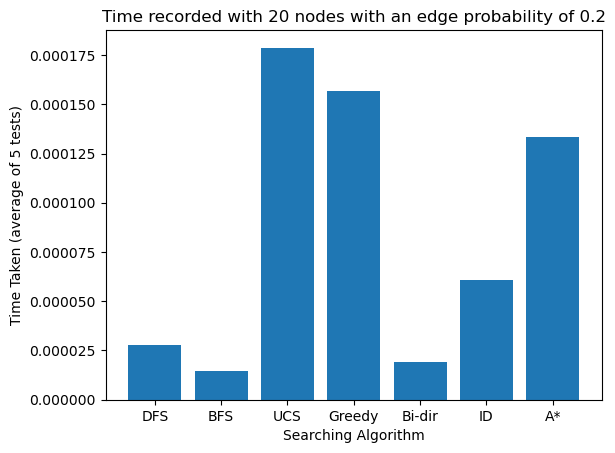

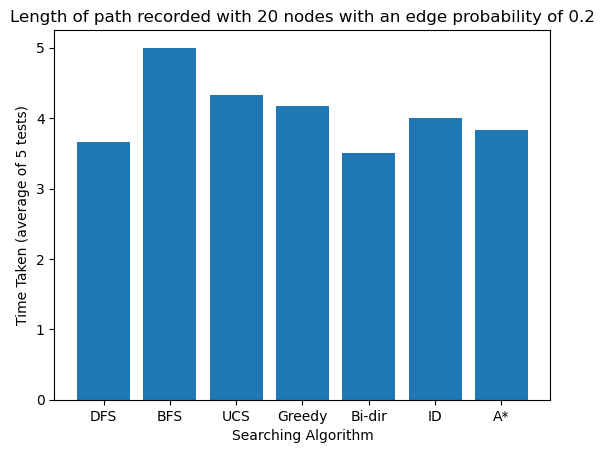

[3.6666666666666665, 5.0, 4.333333333333333, 4.166666666666667, 3.5, 4.0, 3.8333333333333335]


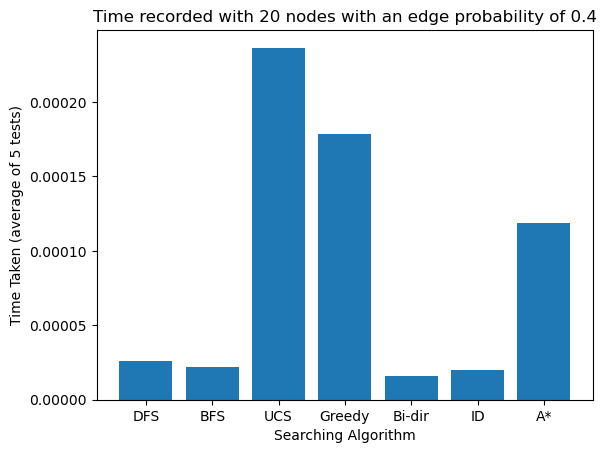

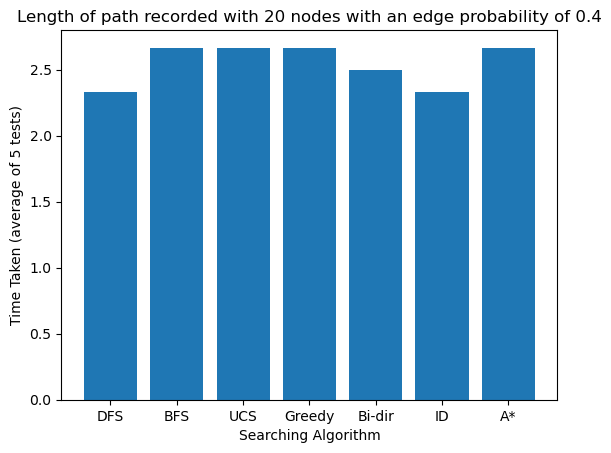

[2.3333333333333335, 2.6666666666666665, 2.6666666666666665, 2.6666666666666665, 2.5, 2.3333333333333335, 2.6666666666666665]


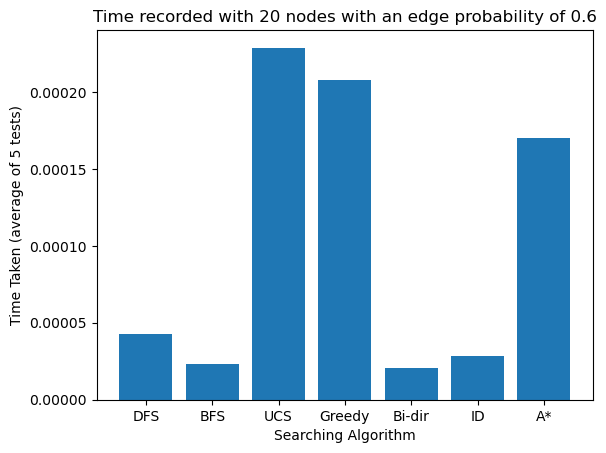

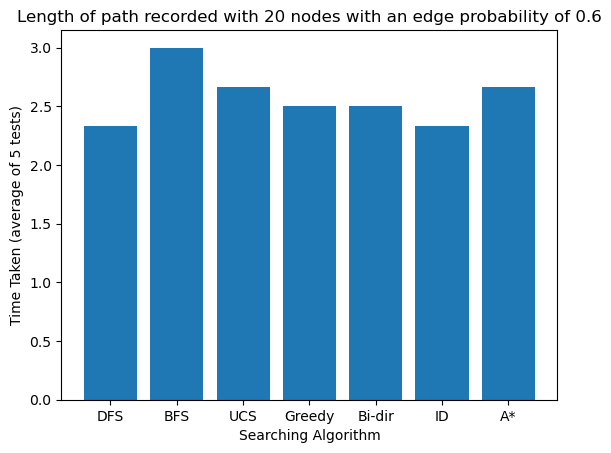

[2.3333333333333335, 3.0, 2.6666666666666665, 2.5, 2.5, 2.3333333333333335, 2.6666666666666665]


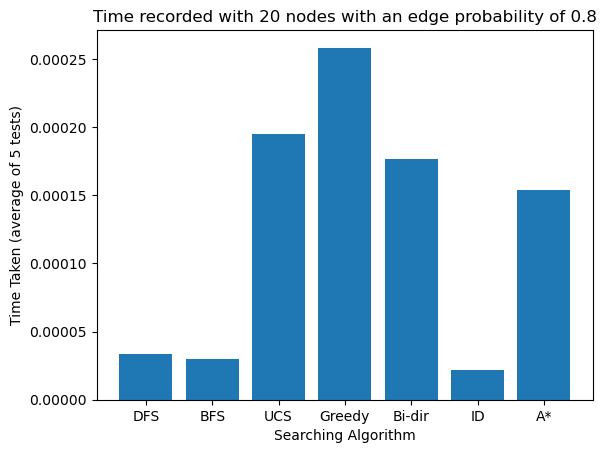

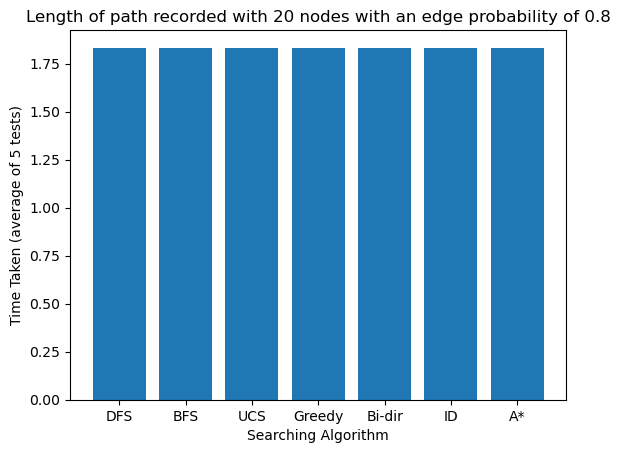

[1.8333333333333333, 1.8333333333333333, 1.8333333333333333, 1.8333333333333333, 1.8333333333333333, 1.8333333333333333, 1.8333333333333333]


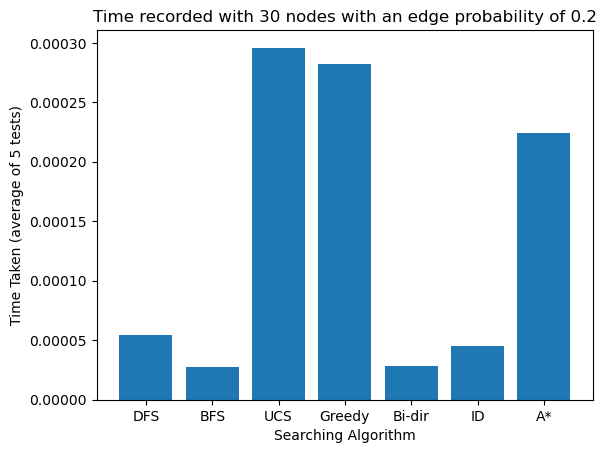

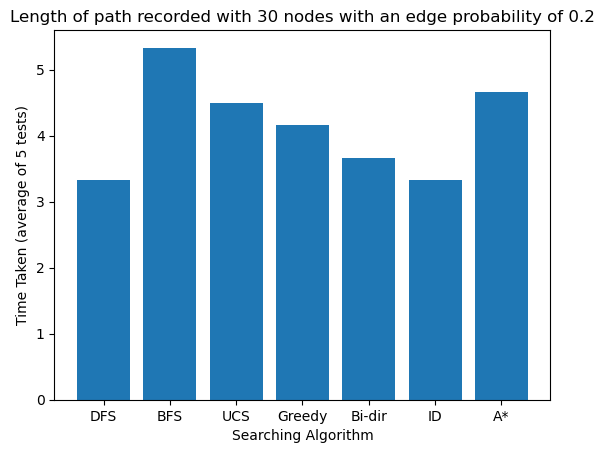

[3.3333333333333335, 5.333333333333333, 4.5, 4.166666666666667, 3.6666666666666665, 3.3333333333333335, 4.666666666666667]


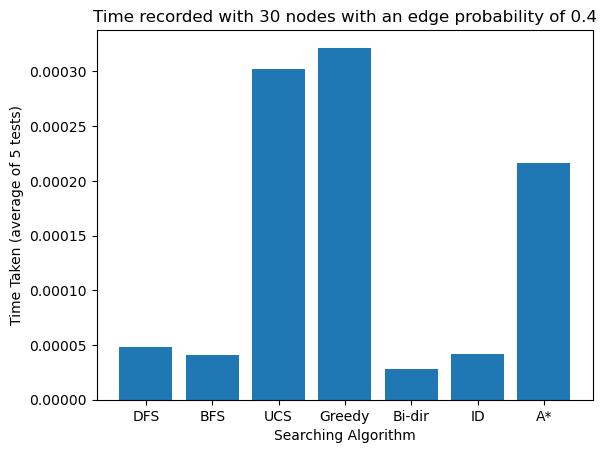

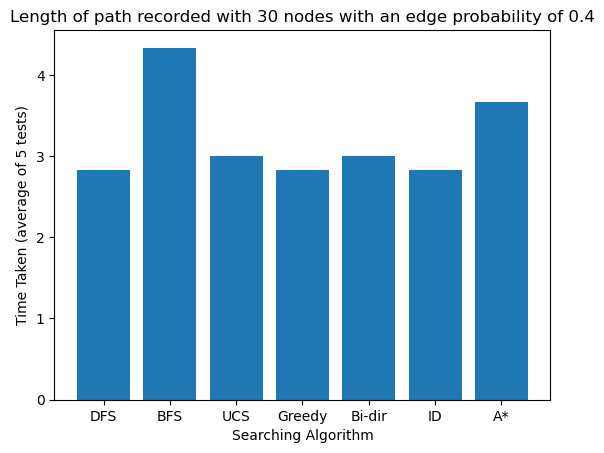

[2.8333333333333335, 4.333333333333333, 3.0, 2.8333333333333335, 3.0, 2.8333333333333335, 3.6666666666666665]


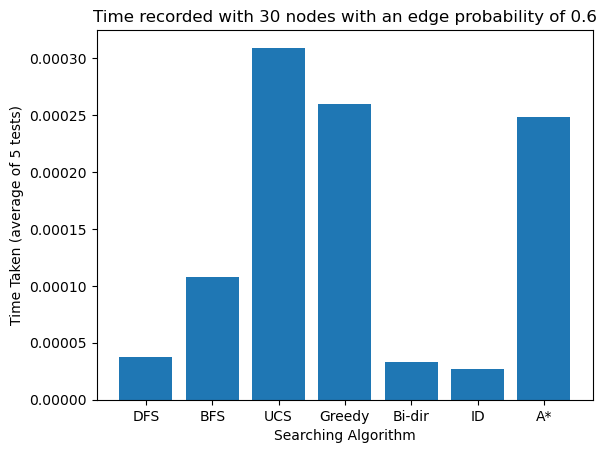

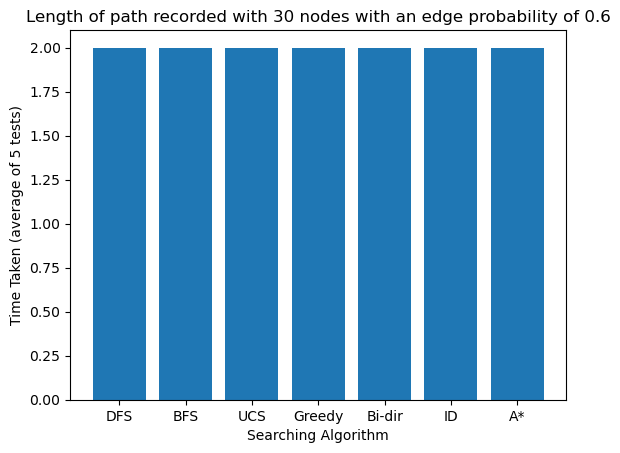

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


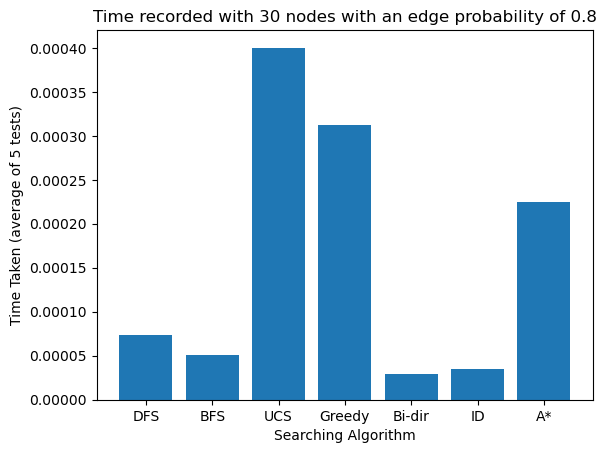

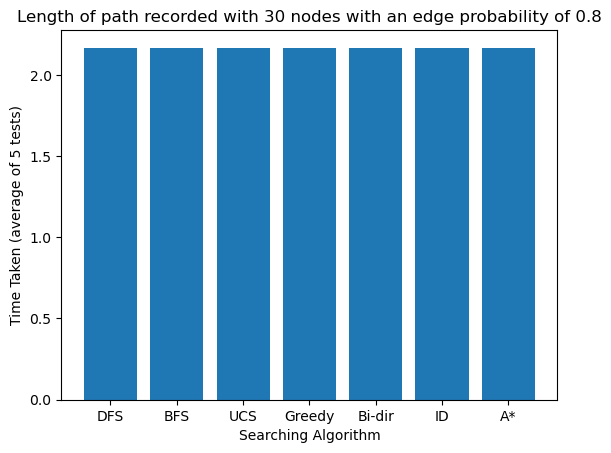

[2.1666666666666665, 2.1666666666666665, 2.1666666666666665, 2.1666666666666665, 2.1666666666666665, 2.1666666666666665, 2.1666666666666665]


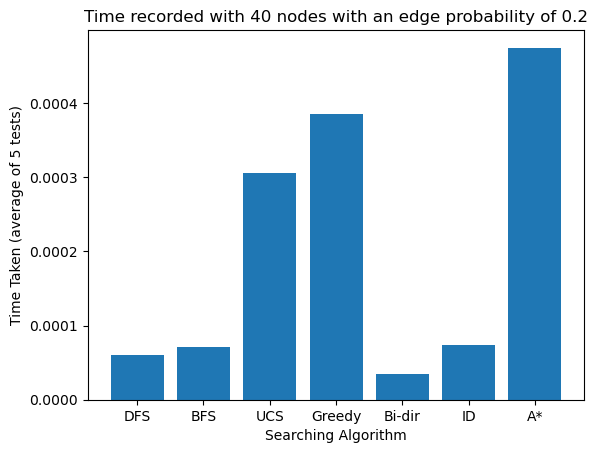

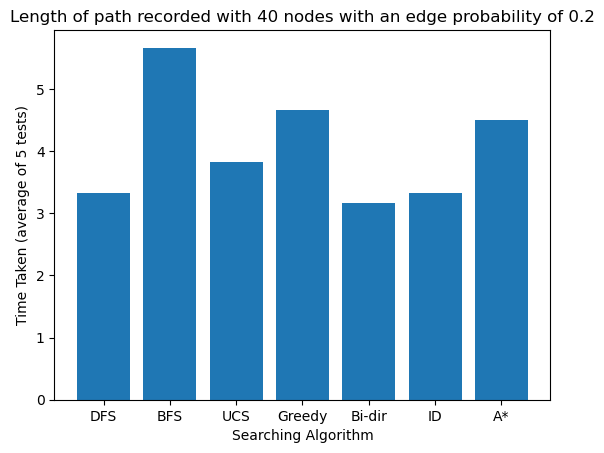

[3.3333333333333335, 5.666666666666667, 3.8333333333333335, 4.666666666666667, 3.1666666666666665, 3.3333333333333335, 4.5]


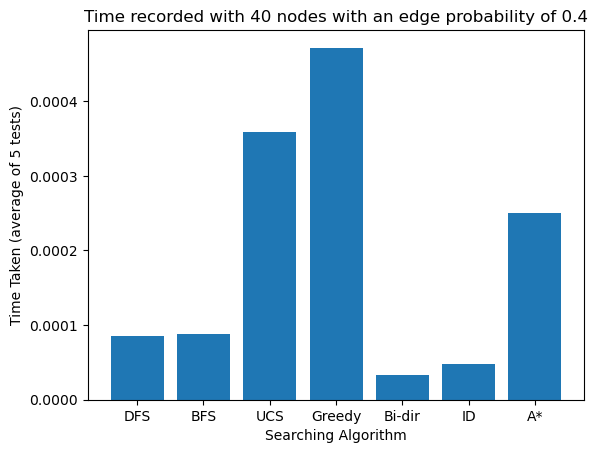

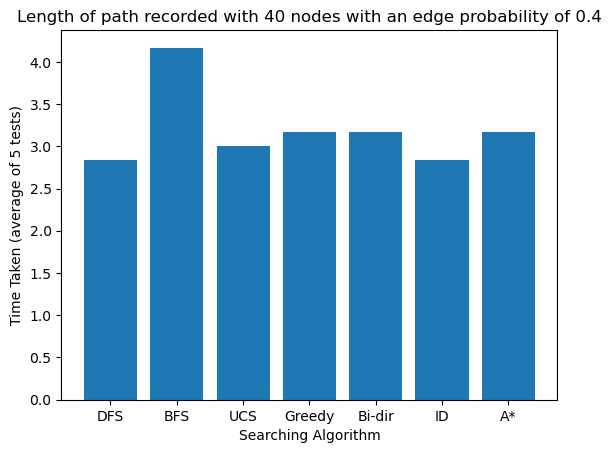

[2.8333333333333335, 4.166666666666667, 3.0, 3.1666666666666665, 3.1666666666666665, 2.8333333333333335, 3.1666666666666665]


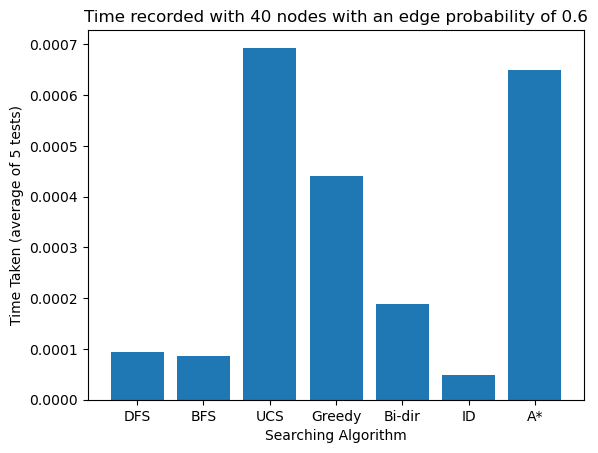

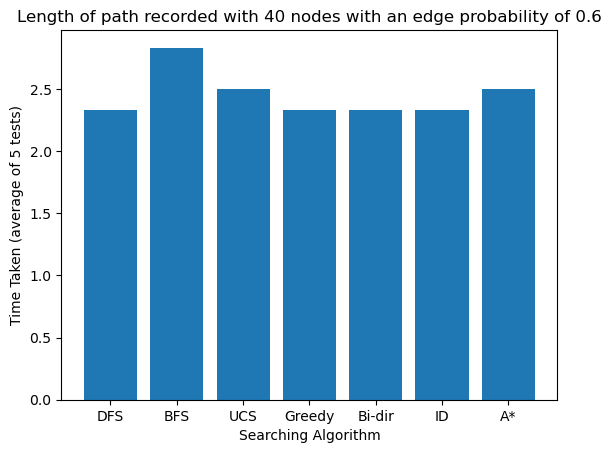

[2.3333333333333335, 2.8333333333333335, 2.5, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.5]


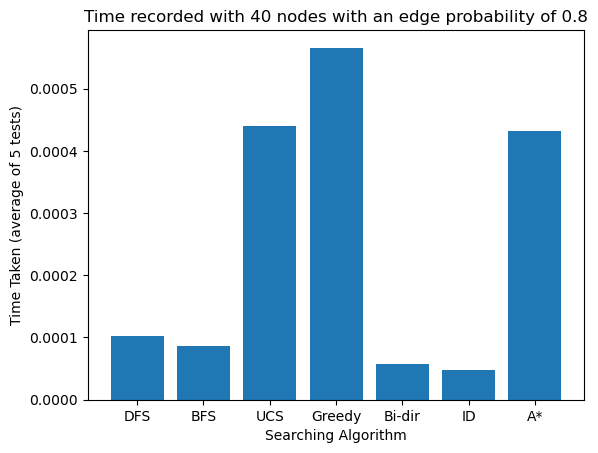

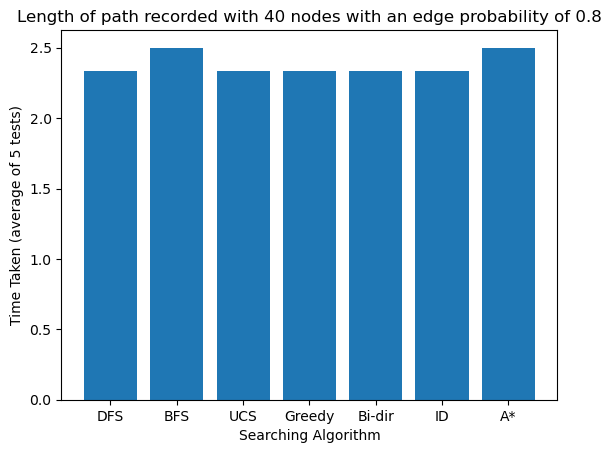

[2.3333333333333335, 2.5, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.5]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from experiment_2_randomized_graphs import results, variations

times = []
path_lens = []
for res in results:
    time = []
    len_ = []
    for t, l in res:
        time.append(t)
        len_.append(l)
    
    times.append(time)
    path_lens.append(len_)

i = 0
for c, p in variations:
    titles = ["DFS", "BFS", "UCS", "Greedy", "Bi-dir", "ID", "A*"]
    plt.title(f'Time recorded with {c} nodes with an edge probability of {p}')
    plt.xlabel('Searching Algorithm')
    plt.ylabel('Time Taken (average of 5 tests)')
    plt.bar(titles, times[i])
    plt.show()

    plt.title(f'Length of path recorded with {c} nodes with an edge probability of {p}')
    plt.xlabel('Searching Algorithm')
    plt.ylabel('Time Taken (average of 5 tests)')
    plt.bar(titles, path_lens[i])
    plt.show()

    i += 1
    